# Predicting Hotel Cancellations
<img src = 'Hotel.PNG' width = 500, height = 500><br>
## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

### Importing necessary libraries

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import glob
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import classification_report

pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('./hotel_bookings.csv')
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001           NaN             NaN                   NaN   
1   INN00002           2.0             0.0                   2.0   
2   INN00003           1.0             0.0                   2.0   
3   INN00004           2.0             0.0                   0.0   
4   INN00005           2.0             0.0                   1.0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                NaN               NaN                         NaN   
1                3.0      Not Selected                         0.0   
2                1.0       Meal Plan 1                         0.0   
3                2.0       Meal Plan 1                         0.0   
4                1.0      Not Selected                         0.0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                NaN        NaN           NaN            NaN           NaN   
1        Room_Type 1        5.0        2018.0           11.0           6.0   
2        Room_Type 1        1.0        2018.0            2.0          28.0   
3        Room_Type 1      211.0        2018.0            5.0          20.0   
4        Room_Type 1       48.0        2018.0            4.0          11.0   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 NaN             NaN                           NaN   
1              Online             0.0                           0.0   
2              Online             0.0                           0.0   
3              Online             0.0                           0.0   
4              Online             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   NaN                 NaN   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests booking_status  
0                     NaN   Not_Canceled  
1                     1.0   Not_Canceled  
2                     0.0       Canceled  
3                     0.0       Canceled  
4                     0.0       Canceled

### Basic Data Exploration

- Checking for NaN Values
- Checking for duplicated rows
- Data types of the variables we are dealing with
- Some basic statistics of the data
- Distribution of the target variable

In [4]:
data.isna().sum().sort_values(ascending = False)

required_car_parking_space              2592
market_segment_type                     1512
room_type_reserved                      1171
arrival_date                             981
no_of_week_nights                        807
no_of_special_requests                   789
repeated_guest                           586
no_of_previous_bookings_not_canceled     550
type_of_meal_plan                        526
arrival_month                            504
no_of_previous_cancellations             497
lead_time                                472
avg_price_per_room                       460
no_of_adults                             413
arrival_year                             378
no_of_weekend_nights                     367
no_of_children                           324
Booking_ID                                 0
booking_status                             0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [7]:
data.describe().T

count         mean        std     min  \
no_of_adults                          35862.0     1.845017   0.518652     0.0   
no_of_children                        35951.0     0.105366   0.402871     0.0   
no_of_weekend_nights                  35908.0     0.810209   0.870857     0.0   
no_of_week_nights                     35468.0     2.203310   1.409890     0.0   
required_car_parking_space            33683.0     0.030698   0.172501     0.0   
lead_time                             35803.0    85.276569  85.998845     0.0   
arrival_year                          35897.0  2017.820431   0.383834  2017.0   
arrival_month                         35771.0     7.424031   3.068277     1.0   
arrival_date                          35294.0    15.605712   8.743484     1.0   
repeated_guest                        35689.0     0.025666   0.158140     0.0   
no_of_previous_cancellations          35778.0     0.023646   0.370835     0.0   
no_of_previous_bookings_not_canceled  35725.0     0.154458   1.764805     0.0   
avg_price_per_room                    35815.0   103.418207  35.057342     0.0   
no_of_special_requests                35486.0     0.619343   0.785849     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [8]:
print(data.booking_status.value_counts())
print()
print(data.booking_status.value_counts(normalize = True)*100)

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


Initial analysis of that data has shown that quite a number of missing values were detected in the dataset.The only variables that do not contain any missing values are `Booking_ID` and `Booking Status`. We will have to address this problem prior to model building.<br>

The dataset does not contain any repeating rows/duplicated rows, and majority of the data is numeric values.

### EDA

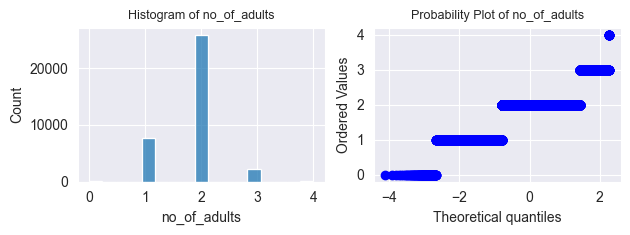

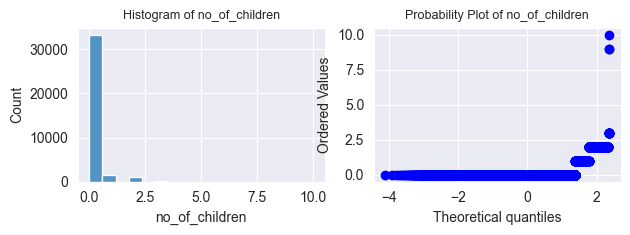

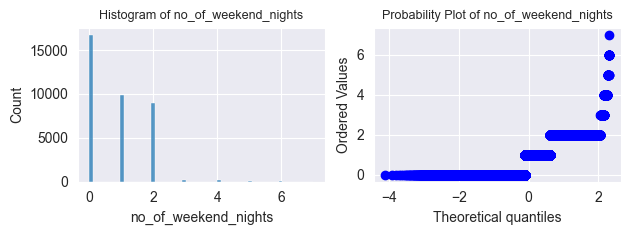

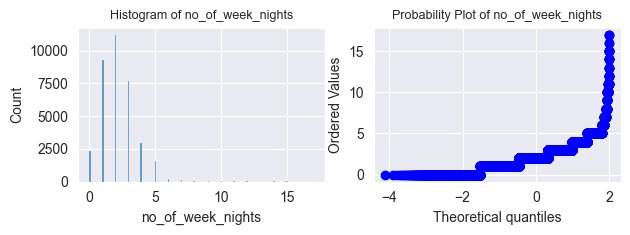

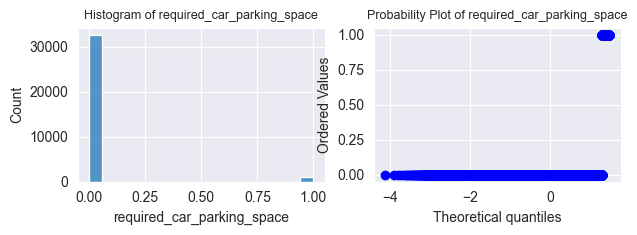

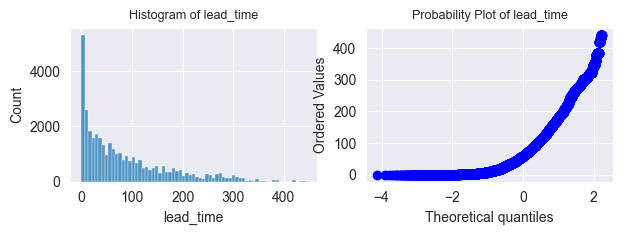

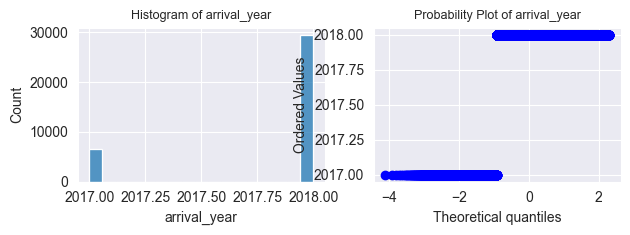

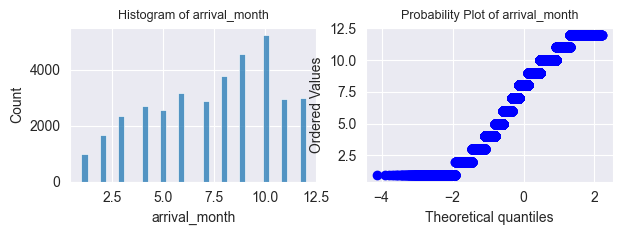

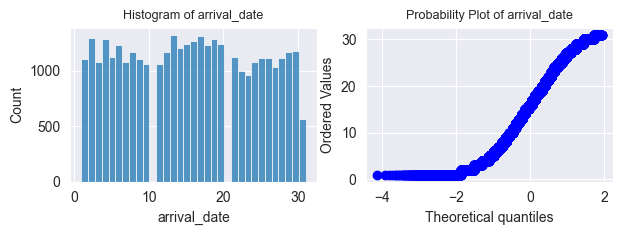

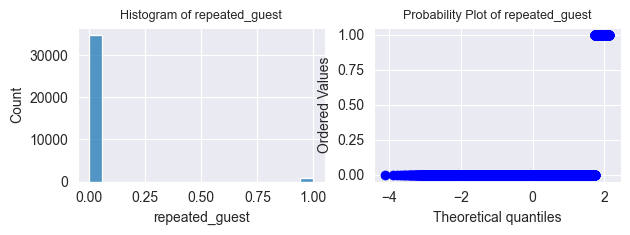

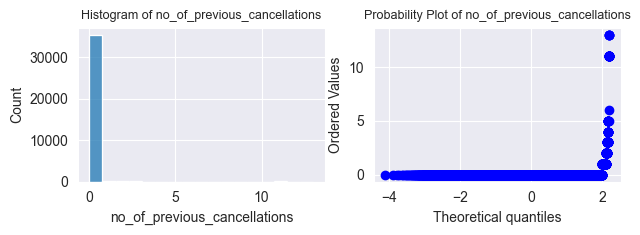

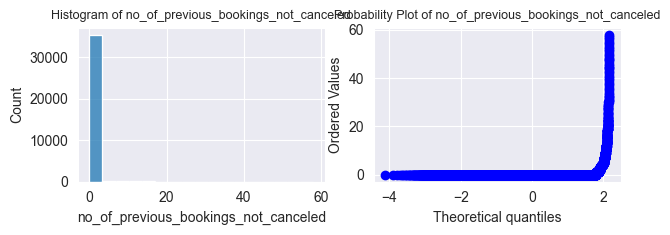

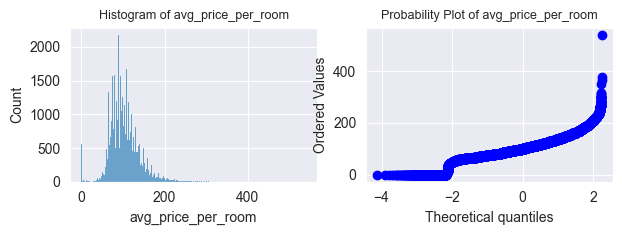

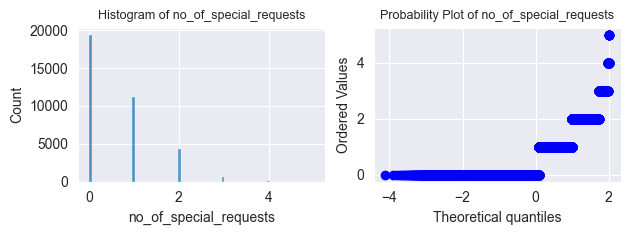

In [9]:
### Carrying out some univariate analysis
data_numeric = data.select_dtypes(include = ['int64', 'float64'])
sns.set_style('darkgrid')
for variable in data_numeric.columns:
    fig,ax = plt.subplots(1,2, figsize = (7,2))
    sns.histplot(data = data_numeric, x = variable, ax = ax[0])
    stats.probplot(data_numeric[variable], plot = ax[1])
    ax[0].set_title(f'Histogram of {variable}', fontsize = 9)
    ax[1].set_title(f'Probability Plot of {variable}', fontsize = 9)
    plt.show()

Lets take a look at the correlation between the different numerical variables as well.

In [10]:
## Understanding the correlation between variables

df_corr = data_numeric.corr()
df_corr

fig = px.imshow(df_corr, x=df_corr.columns, y=df_corr.columns, color_continuous_scale='RdBu')

# Customize the layout if needed
fig.update_layout(title='Correlation Matrix',
                  width=800, height=800, paper_bgcolor = 'black', plot_bgcolor = 'black', font = dict(color = 'white'))

fig.show()

In [11]:
## Taking a look at the categorical variables
df_cat = data.select_dtypes(include = ['object'])
# Dropping the booking ID.
df_cat.drop(columns = ['Booking_ID'], inplace = True)

for variable in df_cat.columns:
    fig = px.histogram(df_cat, x = variable,color = 'booking_status', title = f'Distribution of {variable}',barmode = 'group')
    fig.update_layout(paper_bgcolor = 'black', plot_bgcolor = 'black', font = dict(color = 'white'), bargap = 0.6)
    fig.show()



Upon analyzing the categorical variables, it is evident that the majority of instances are categorized as 'Not_Canceled.' However, to obtain a more precise assessment, it is advisable to calculate the percentage of cancellations. Relying solely on the counts may be misleading, as the dataset inherently comprises 67% 'Not_Canceled' instances and 33% 'Canceled' instances, potentially skewing the interpretation towards a higher prevalence of 'Not_Canceled' outcomes.

In [12]:
# Creating a function for pivot tabling each variable:

def pivot(df, variable):
    df['count'] = 1
    grp = df.pivot_table(index = [variable],columns = ['booking_status'] ,values = ['count'], aggfunc = 'count')
    grp['percentage_cancellation'] = (grp['count','Canceled']/(grp['count','Canceled']+grp['count','Not_Canceled']))*100
    return grp

for x in df_cat.columns:
    if (x != 'booking_status') and (x!= 'count'):
        table = pivot(df_cat,x).sort_values('percentage_cancellation', ascending = False)
        print(table)
        print('\n')

                     count              percentage_cancellation
booking_status    Canceled Not_Canceled                        
type_of_meal_plan                                              
Meal Plan 2           1488         1778               45.560318
Not Selected          1678         3379               33.181728
Meal Plan 1           8542        18879               31.151307
Meal Plan 3              1            4               20.000000


                      count              percentage_cancellation
booking_status     Canceled Not_Canceled                        
room_type_reserved                                              
Room_Type 6             396          543               42.172524
Room_Type 4            1998         3853               34.148009
Room_Type 3               2            4               33.333333
Room_Type 2             218          446               32.831325
Room_Type 1            8789        18445               32.272160
Room_Type 5              70   

By calculating the cancellation percentage, we obtain a nuanced analysis of the cancellation status across various variables.

Specifically, guest with `Meal Plan 2` included in their bookings exhibits the highest cancellation percentage amongst other customers.<br>

Additionally, guests booking `Room_Type_6` are observed to have a higher tendency to cancel their booking requests.<br>

 In terms of market_segment_type, bookings made through the `Online` channel demonstrate a notably higher cancellation rate compared to alternative booking methods.

### Data Preprocessing/ Data Preparation

- Handling Null Values
- Encoding the variables
- train_test_split

Before proceeding further with model building, we will tackle the missing values observed during our initial analysis.

In [13]:
from sklearn.impute import SimpleImputer

df = data.copy()
num = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']
categorical = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

mean_val = SimpleImputer(strategy = 'mean')
common_val = SimpleImputer(strategy = 'most_frequent')

df[num] = mean_val.fit_transform(df[num])
df[categorical] = common_val.fit_transform(df[categorical])

df.isna().sum() # All NA values are replaced

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
## Dropping unecessary columns from the dataset
df.drop(columns = ['Booking_ID'], inplace = True)
df['booking_status'] = df.apply(lambda x: 1 if x['booking_status'] == 'Canceled' else 0, axis = 1)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      1.845017        0.105366              0.810209            2.20331   
1      2.000000        0.000000              2.000000            3.00000   
2      1.000000        0.000000              2.000000            1.00000   
3      2.000000        0.000000              0.000000            2.00000   
4      2.000000        0.000000              1.000000            1.00000   

  type_of_meal_plan  required_car_parking_space room_type_reserved  \
0       Meal Plan 1                    0.030698        Room_Type 1   
1      Not Selected                    0.000000        Room_Type 1   
2       Meal Plan 1                    0.000000        Room_Type 1   
3       Meal Plan 1                    0.000000        Room_Type 1   
4      Not Selected                    0.000000        Room_Type 1   

    lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
0   85.276569   2017.820431       7.424031     15.605712              Online   
1    5.000000   2018.000000      11.000000      6.000000              Online   
2    1.000000   2018.000000       2.000000     28.000000              Online   
3  211.000000   2018.000000       5.000000     20.000000              Online   
4   48.000000   2018.000000       4.000000     11.000000              Online   

   repeated_guest  no_of_previous_cancellations  \
0        0.025666                      0.023646   
1        0.000000                      0.000000   
2        0.000000                      0.000000   
3        0.000000                      0.000000   
4        0.000000                      0.000000   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                              0.154458          103.418207   
1                              0.000000          106.680000   
2                              0.000000           60.000000   
3                              0.000000          100.000000   
4                              0.000000           94.500000   

   no_of_special_requests  booking_status  
0                0.619343               0  
1                1.000000               0  
2                0.000000               1  
3                0.000000               1  
4                0.000000               1

In [15]:
## One hot encoding the categorical variables

df_encoded = pd.get_dummies(df, drop_first = True, dtype = int) # int is specified so that it is encoded to 1 and 0 instead of True and False
df_encoded

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0          1.845017        0.105366              0.810209            2.20331   
1          2.000000        0.000000              2.000000            3.00000   
2          1.000000        0.000000              2.000000            1.00000   
3          2.000000        0.000000              0.000000            2.00000   
4          2.000000        0.000000              1.000000            1.00000   
...             ...             ...                   ...                ...   
36270      3.000000        0.000000              2.000000            2.20331   
36271      2.000000        0.000000              1.000000            3.00000   
36272      2.000000        0.000000              2.000000            6.00000   
36273      2.000000        0.000000              0.000000            3.00000   
36274      2.000000        0.000000              1.000000            2.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
0                        0.030698   85.276569   2017.820431       7.424031   
1                        0.000000    5.000000   2018.000000      11.000000   
2                        0.000000    1.000000   2018.000000       2.000000   
3                        0.000000  211.000000   2018.000000       5.000000   
4                        0.000000   48.000000   2018.000000       4.000000   
...                           ...         ...           ...            ...   
36270                    0.000000   85.000000   2018.000000       8.000000   
36271                    0.000000  228.000000   2018.000000      10.000000   
36272                    0.000000  148.000000   2018.000000       7.000000   
36273                    0.000000   63.000000   2018.000000       4.000000   
36274                    0.030698  207.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
0         15.605712        0.025666                      0.023646   
1          6.000000        0.000000                      0.000000   
2         28.000000        0.000000                      0.000000   
3         20.000000        0.000000                      0.000000   
4         11.000000        0.000000                      0.000000   
...             ...             ...                           ...   
36270      3.000000        0.025666                      0.000000   
36271     17.000000        0.000000                      0.000000   
36272      1.000000        0.000000                      0.000000   
36273     21.000000        0.000000                      0.000000   
36274     30.000000        0.000000                      0.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                  0.154458          103.418207   
1                                  0.000000          106.680000   
2                                  0.000000           60.000000   
3                                  0.000000          100.000000   
4                                  0.000000           94.500000   
...                                     ...                 ...   
36270                              0.000000          167.800000   
36271                              0.000000           90.950000   
36272                              0.000000           98.390000   
36273                              0.000000           94.500000   
36274                              0.000000          161.670000   

       no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 2  \
0                    0.619343               0                              0   
1                    1.000000               0                              0   
2                    0.000000               1                              0   
3                    0.000000               1                              0   
4                    0.000000               1                              

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

## Splitting the data in training and test sets
X = df_encoded.drop(columns = ['booking_status'])
y = df_encoded['booking_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25392, 27)
(25392,)
(10883, 27)
(10883,)


### Model Building

- Decision Trees
- Random Forest
- Logistic Regression
- SVM

#### Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


dt = DecisionTreeClassifier(random_state = 42)

params = {'max_depth':[None,2,3,5,6,10],
         'min_samples_split':[2,5,10,20,50],
         'min_samples_leaf':[1,5,10,50]
         }

scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc']

# Hypertuning the model and performing cross validation
dt_hypertune = GridSearchCV(dt,params, scoring = scoring, cv = 5 ,refit = 'roc_auc')

#Fitting the hypertuned model
dt_hypertune.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 3, 5, 6, 10],
                         'min_samples_leaf': [1, 5, 10, 50],
                         'min_samples_split': [2, 5, 10, 20, 50]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [18]:
## Checking the feature importance score of the best parameters:
print(f'Best CV Results: {dt_hypertune.best_params_}')

feature_importance = dt_hypertune.best_estimator_.feature_importances_

importance_table = pd.DataFrame(feature_importance, index = X_train.columns).sort_values(0,ascending = False)
importance_table.rename(columns = {0:'Importance_Score'}, inplace = True)
importance_table.head(10)

Best CV Results: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50}


Importance_Score
lead_time                           0.423000
avg_price_per_room                  0.147491
no_of_special_requests              0.123349
market_segment_type_Online          0.122379
arrival_month                       0.043937
no_of_adults                        0.037448
arrival_year                        0.025071
no_of_weekend_nights                0.017702
no_of_week_nights                   0.016432
arrival_date                        0.012782

In [19]:
## Checking the cross validated results:
cv_result = pd.DataFrame(dt_hypertune.cv_results_)

## Creating a function that tabulates the best roc_auc score from each model
def table(model, best_score):
    t = pd.DataFrame({'Model':[model],'ROC_AUC_Score':[best_score]})
    return t

dt_table = table('Decision Tree', dt_hypertune.best_score_)
dt_table

Model  ROC_AUC_Score
0  Decision Tree       0.913924

The Decision Tree model exhibits a high ROC_AUC score of 0.91 (91%). Interestingly from the feature importances derived from the model, lead time exhibits a high value of importance score. It might be worth analyzing the relationship between the variable and the cancelation status of hotel bookings.

#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

params = {'n_estimators':[50,100],
         'max_depth':[3,6,9,12,15],
     'min_samples_split':[2,10,20]}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf_hypertune = GridSearchCV(rf, params, scoring = scoring, cv = 5, refit = 'roc_auc')

rf_hypertune.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [50, 100]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [21]:
print(f'Best Params for Random Forest are: {rf_hypertune.best_params_}')

feature_importance = pd.DataFrame(rf_hypertune.best_estimator_.feature_importances_, index = X_train.columns).sort_values(0, ascending = False)
feature_importance.rename(columns = {0:'Importance_Score'}, inplace = True)
feature_importance

Best Params for Random Forest are: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


Importance_Score
lead_time                                     0.337373
no_of_special_requests                        0.143228
avg_price_per_room                            0.137970
arrival_month                                 0.070982
arrival_date                                  0.052815
market_segment_type_Online                    0.037786
arrival_year                                  0.037619
no_of_week_nights                             0.036513
no_of_weekend_nights                          0.029584
no_of_adults                                  0.024118
market_segment_type_Offline                   0.020331
type_of_meal_plan_Meal Plan 2                 0.014923
required_car_parking_space                    0.011768
market_segment_type_Corporate                 0.007379
room_type_reserved_Room_Type 4                0.006992
type_of_meal_plan_Not Selected                0.006812
no_of_children                                0.006469
repeated_guest                                0.004209
no_of_previous_bookings_not_canceled          0.004195
no_of_previous_cancellations                  0.002128
room_type_reserved_Room_Type 2                0.002050
room_type_reserved_Room_Type 5                0.001623
room_type_reserved_Room_Type 6                0.001518
market_segment_type_Complementary             0.001195
room_type_reserved_Room_Type 7                0.000348
type_of_meal_plan_Meal Plan 3                 0.000057
room_type_reserved_Room_Type 3                0.000015

In [22]:
rf_results = pd.DataFrame(rf_hypertune.cv_results_)
rf_hypertune.best_score_

rf_table = table('Random Forest', rf_hypertune.best_score_)
rf_table

Model  ROC_AUC_Score
0  Random Forest        0.93846

The random forest model exhibits a slightly better roc_auc score of 0.93 (93%) compared to the decision tree model. Interestingly from the feature importances derived from the random forest model, the top 3 features are similar to that derived from the decision tree model.

#### XG Boost

#### Support Vector Machines (SVM)

In [23]:
from sklearn.svm import SVC

# svm_classifier = SVC(random_state = 42)

# params = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     }

# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# svm_classifier_hypertune = GridSearchCV(svm_classifier, params, scoring = scoring, cv = 5, refit = 'roc_auc')

# svm_classifier_hypertune.fit(X_train, y_train)

# # Saving to pickle
# with open('svm_classifier_model.pkl', 'wb') as file:
#     pickle.dump(svm_classifier_hypertune, file)

# Loading the model saved from pickle
with open('svm_classifier_model.pkl', 'rb') as file:
    svm_classifier_hypertune = pickle.load(file)

In [24]:
svc_results = pd.DataFrame(svm_classifier_hypertune.cv_results_)
svc_table = table('SVM-C',svm_classifier_hypertune.best_score_)
svc_table

Model  ROC_AUC_Score
0  SVM-C       0.850623

The SVC model showcase a good roc_auc score of 0.85 (85%), however scoring is much lower in comparison to the decision tree and random forest model.

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(random_state = 42)

# params = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'newton-cg'],
#     'max_iter': [None,100, 500, 1000]
#     }

# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# lr_hypertune = GridSearchCV(lr, params, scoring = scoring, cv = 5, refit = 'roc_auc')

# lr_hypertune.fit(X_train, y_train)

# Saving the model into pickle
# with open('lr_hypertune.pkl', 'wb') as file:
#     pickle.dump(lr_hypertune, file)
    
with open('lr_hypertune', 'rb') as file:
    lr_hypertune = pickle.load(file)

In [26]:
print(f'Best Params for Logistic Regression Model: {lr_hypertune.best_params_}')

lr_results = pd.DataFrame(lr_hypertune.cv_results_)

lr_table = table('Logistic Regression', lr_hypertune.best_score_)

lr_table

Best Params for Logistic Regression Model: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}


Model  ROC_AUC_Score
0  Logistic Regression        0.85648

The Linear Regression model also exhibits a good roc_auc score of 0.856 (85.6%), however scoring is also much lower in comparison to the decision tree and random forest model.

In [27]:
full_table = pd.concat([svc_table,lr_table,rf_table,dt_table],axis = 0)
full_table.sort_values('ROC_AUC_Score', ascending = False)

Model  ROC_AUC_Score
0        Random Forest       0.938460
0        Decision Tree       0.913924
0  Logistic Regression       0.856480
0                SVM-C       0.850623

Overall, the random rorest model seems to exhibit the best performance. We will select the model to predict our test set.

### Model Prediction

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve
plt.rcParams['figure.facecolor'] ='w'

# Using the hypertuned random forest model to fit the training set
rf_tuned = rf_hypertune.best_estimator_
rf_tuned.fit(X_train,y_train)   

# Predicting the test set
y_pred = rf_tuned.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7276
           1       0.87      0.76      0.81      3607

    accuracy                           0.88     10883
   macro avg       0.88      0.85      0.86     10883
weighted avg       0.88      0.88      0.88     10883


ROC_AUC score is: 0.8525497235004991


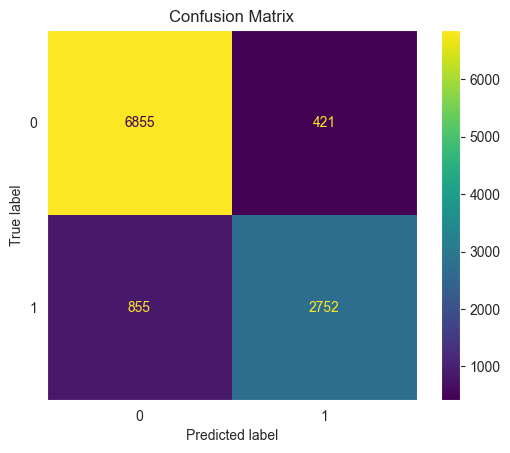

In [29]:
# Showing the classification report
print(classification_report(y_test,y_pred))
print()
print(f'ROC_AUC score is: {roc_auc_score(y_test,y_pred)}')

# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

The random forest model demonstrates strong predictive performance, achieving an average ROC AUC score of 85% and an overall score of 88% across precision, recall, accuracy, and F1 metrics. These robust metrics attest to the model's effectiveness in predicting hotel booking cancellations.

Upon feature importance analysis, the model highlights three key factors significantly influencing booking cancellations: `lead_time`, `no_of_special_request`, and `avg_price_per_room`. These features play a pivotal role in shaping the model's predictions, providing valuable insights into the determinants of customer behavior regarding hotel reservations.

Now, let's delve deeper into the intricacies of these three key factors identified by our model.

### Further Data Exploration

In [47]:
fig = px.histogram(data, x = 'avg_price_per_room', color = 'booking_status', title = 'Distribution of avg price per room by cancellation status', 
                   barmode = 'overlay', color_discrete_sequence = ['pink', 'red'], marginal = 'box')
fig.update_layout(plot_bgcolor = 'black', paper_bgcolor = 'black', font = dict(color = 'white'))
fig.show()

In [48]:
fig = px.histogram(data, x = 'lead_time', color = 'booking_status', title = 'Distribution of lead_time by cancellation status', 
                   barmode = 'overlay', color_discrete_sequence = ['pink', 'red'], marginal = 'box')
fig.update_layout(plot_bgcolor = 'black', paper_bgcolor = 'black', font = dict(color = 'white'))
fig.show()

In [51]:
fig = px.histogram(data, x = 'no_of_special_requests', color = 'booking_status', title = 'Distribution of no_of_special_requests by cancellation status', 
                   barmode = 'group', color_discrete_sequence = ['pink', 'red'], marginal = 'box')
fig.update_layout(plot_bgcolor = 'black', paper_bgcolor = 'black', font = dict(color = 'white'))
fig.show()

All three key variables analyzed align with our model's predictions, indicating that increased lead time for bookings and higher average room prices correlate with a higher likelihood of booking cancellations by guests.

In the case of no_of_special_requests, it was observed that as the number of special requests by guests increases, the probability of booking cancellations decreases. This observation is logical, as individuals are unlikely to make additional requests if they have no intention of following through with their booking.

In [60]:
fig = px.scatter(data, y = 'avg_price_per_room', x = 'lead_time', color = 'booking_status', 
                 symbol = 'no_of_special_requests', title = 'Relationship between avg price and lead time by booking status and no of special request')
fig.update_layout(plot_bgcolor = 'black', paper_bgcolor = 'black', font = dict(color = 'white'))

fig.show()

From the scatter plot above, it is even clearly deduced that, customers tend to cancel their hotel bookings with 0 - 2 special requests. There are no guest whom have canceled their bookings with 3 or more special requests made.

Additionally, a subtle negative correlation is evident between avg_price_per_room and lead_time. As the lead time for booking and the average price of the room increase, a higher frequency of customer cancellations is observed.

### Conclusions and Recommendations

In conclusion, our data analysis has unveiled significant insights into the factors influencing hotel booking cancellations. The random forest model, with a commendable average ROC AUC score of 85% and an overall score of 88% across various metrics, effectively predicts cancellations. Key variables such as `lead time`, `average price per room`, and the `number of special requests` have emerged as critical indicators. Notably, customers tend to cancel bookings with fewer special requests (0-2), and a negative correlation exists between lead time, average room price, and the likelihood of cancellations.

Recommendations:

Targeted Marketing Strategies:<br>
Utilize the predictive power of our model to implement targeted marketing strategies. Focus on customers with specific lead times and average room prices to tailor promotions or incentives that encourage commitment.

Enhanced Customer Engagement:<br>
Recognize the significance of special requests. Consider offering personalized services or incentives for guests with fewer special requests to mitigate cancellations. Engaging customers early in the booking process can foster commitment.

Dynamic Pricing Strategies:<br>
Implement dynamic pricing strategies that consider lead time and average room prices. Adjust pricing models to incentivize early bookings or offer discounts during periods of low demand.

Customer Feedback and Communication:<br>
Gather customer feedback to understand the reasons behind cancellations. Implement effective communication channels to address concerns, provide additional information, and potentially prevent cancellations through improved customer satisfaction.

By strategically implementing these recommendations, hotel management can leverage data-driven insights to reduce cancellation rates, enhance customer satisfaction, and optimize revenue streams.

